In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# read in .csv file and limit to 'Residential' building type for analysis

df = pd.read_csv('energy-usage-2010.csv', low_memory=False)
df_residential = df.loc[df['BUILDING TYPE'] == 'Residential']

# Which Chicago neighborhoods have the highest energy consumption (measured in KWH)?

The information contained in the dataset used for this analysis was aggregated from ComEd by Accenture. Data was collected at the Census Block level across the City of Chicago during the 2010 census. Note that this analysis focuses on residential properties only.

This data could be of interest to anyone looking to better understand residential energy usage patterns in the Chicago metropolitan area. Utility providers in particular might be interested in a summary of this dataset so that they can address any outliers by reallocating resources to high-use areas or by adjusting their pricing in order to maximize profits.

Text(0.5, 1.0, 'Total KWH by Neighborhood - 2010')

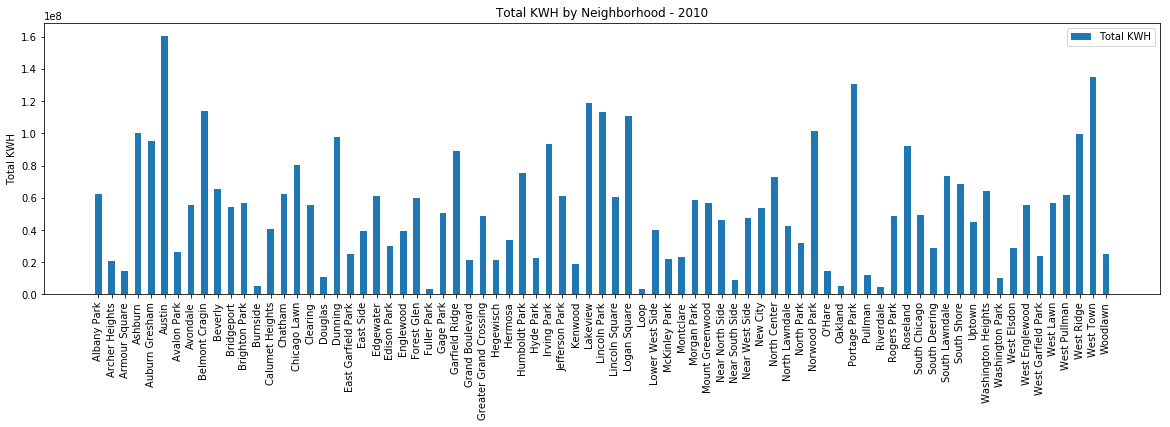

In [2]:
## 2010 KWH usage by neighborhood

# select applicable columns and sum

df_neighborhood = df_residential.groupby(['COMMUNITY AREA NAME']).sum()
sdf_neighborhood = df_neighborhood.iloc[:,1:]
sdf_neighborhood.reset_index(inplace=True); sdf_neighborhood
sdf_neighborhood1 = sdf_neighborhood.iloc[:,[0,13,59]]

# create bar chart

plt.figure(figsize=(20,5))
plt.bar(sdf_neighborhood1['COMMUNITY AREA NAME'],sdf_neighborhood1['TOTAL KWH'],width=0.5,label='Total KWH')
plt.xticks(sdf_neighborhood1['COMMUNITY AREA NAME'], rotation='vertical')
plt.legend(loc='upper right')
plt.ylabel('Total KWH')
plt.title('Total KWH by Neighborhood - 2010')

To begin digging deeper into energy consumption patterns in Chicago, we can consider the Total KWH used by each neighborhood in 2010. The bar chart above shows that Austin had the greatest KWH consumption of all Chicago neighborhoods in 2010.  

One potential pitfall of using Total KWH as our metric for comparison across neighborhoods is that we know there are some neighborhoods that have a higher population and a higher number of housing units than others. We can control for this by using Total KWH/Total Units as our metric instead:

Text(0.5, 1.0, 'KWH per Unit by Neighborhood - 2010')

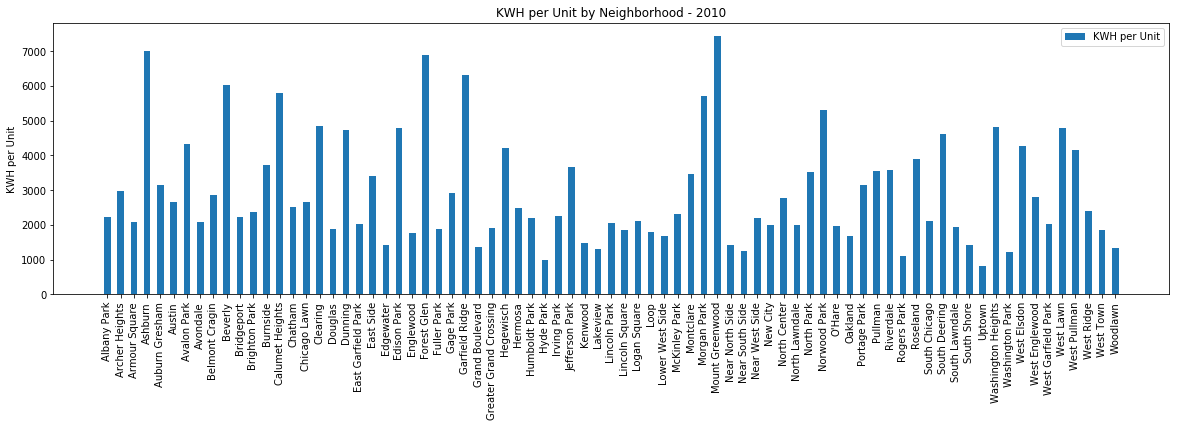

In [3]:
## 2010 KWH/unit usage by neighborhood

# Select applicable columns and sum

df_neighborhood = df_residential.groupby(['COMMUNITY AREA NAME']).sum()
sdf_neighborhood = df_neighborhood.iloc[:,1:]
sdf_neighborhood.reset_index(inplace=True); sdf_neighborhood
sdf_neighborhood1 = sdf_neighborhood.iloc[:,[0,13,59]]

# calculate KWH/unit

KWH_Per_Unit = sdf_neighborhood1['TOTAL KWH'] / sdf_neighborhood1['TOTAL UNITS']

sdf_neighborhood2 = pd.concat([sdf_neighborhood1,KWH_Per_Unit], axis=1)
sdf_neighborhood2.columns.values[3] = 'KWH_Per_Unit'

# create bar chart

plt.figure(figsize=(20,5))
plt.bar(sdf_neighborhood2['COMMUNITY AREA NAME'],sdf_neighborhood2['KWH_Per_Unit'],width=0.5,label='KWH per Unit')
plt.xticks(sdf_neighborhood2['COMMUNITY AREA NAME'], rotation='vertical')
plt.legend(loc='upper right')
plt.ylabel('KWH per Unit')
plt.title('KWH per Unit by Neighborhood - 2010')

This bar chart is similar to the first one showing Total KWH, but it tells a much different story. Now that we're looking at KWH/unit, we have a way of making an apples-to-apples comparison across neighborhoods since everything is on a per unit basis. 

Most notably, Austin _appeared_ to be an outlier in the first bar chart but now that we've controlled for the number of units in that neighborhood (it's a relatively large neighborhood), it comes in at the middle of the pack. Conversely, Mount Greenwood appeared to be about average in our first chart but is now the highest in energy consumption per unit (smaller, less dense neighborhood with fewer housing units).

# Do certain housing types consume more energy than others?

We've controlled for the number of housing units in a given neighborhood, but there are likely other factors that contribute to variability in energy usage. Next, let's look at KWH/unit usage by type of housing:

Text(0, 0.5, 'KWH per Unit')

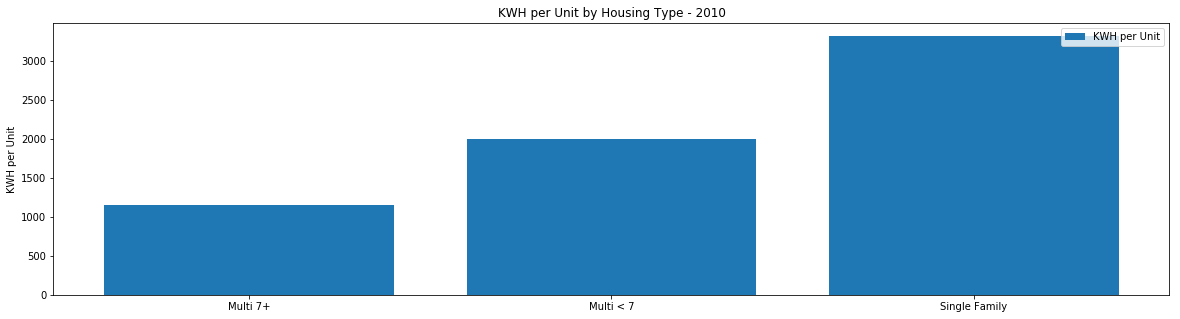

In [4]:
## KWH/unit by building subtype

# select applicable columns and sum

df_subtype = df_residential.groupby(['BUILDING_SUBTYPE']).sum()
sdf_subtype = df_subtype.iloc[:,1:]
sdf_subtype.reset_index(inplace=True); sdf_subtype
sdf_subtype1 = sdf_subtype.iloc[:,[0,13,59]]

# calculate KWH/unit

KWH_Per_Unit = sdf_subtype1['TOTAL KWH'] / sdf_subtype1['TOTAL UNITS']

sdf_subtype2 = pd.concat([sdf_subtype1,KWH_Per_Unit], axis=1)
sdf_subtype2.columns.values[3] = 'KWH_Per_Unit'

# create bar chart

plt.figure(figsize=(20,5),)
plt.bar(sdf_subtype2['BUILDING_SUBTYPE'],sdf_subtype2['KWH_Per_Unit'],label='KWH per Unit')
plt.legend(loc='upper right')
plt.title('KWH per Unit by Housing Type - 2010')
plt.ylabel('KWH per Unit')

It does appear that certain housing types tend to consume more energy per unit than others. It intuitively makes sense that single family homes would have the highest energy consumption per unit. Consider a general formula for energy usage like the one below. There's a variable component based on whether a unit is using more or less energy, but there's also a fixed component just for keeping the power on in a given building:

Total KWH = Variable KWH Usage + Fixed KWH Usage

Single family homes will have to bear the entire load of both the variable and fixed costs since there is only one unit per building. For multi-family homes, each unit would be responsible for the variable portion of the formula but the fixed portion would be spread evenly across all units, thus driving down the average KWH usage per unit (vs. single family homes).

This chart shows that single family homes used more energy per unit than other housing types during the year 2010 in total, but what if there is some seasonal variation that this chart is missing?

Text(0, 0.5, 'Total KWH')

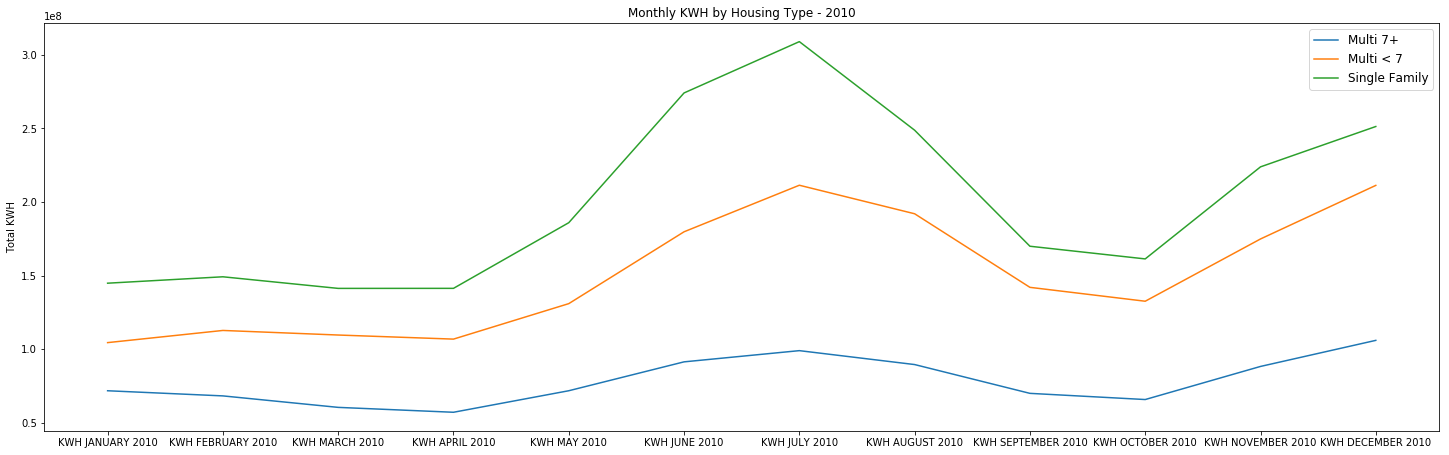

In [5]:
## monthly KWH by building subtype

# Sum monthly KWH data by Building Subtype and transpose

df1 = df.groupby(['BUILDING_SUBTYPE']).sum()
sdf1 = df1.iloc[:,1:13]
tsdf1 = sdf1.transpose()

# Create line graph 

plt.figure(figsize=(25,7.5))

plt.plot(tsdf1['Multi 7+'])
plt.plot(tsdf1['Multi < 7'])
plt.plot(tsdf1['Single Family'])
plt.legend(fontsize='large')
plt.title('Monthly KWH by Housing Type - 2010')
plt.ylabel('Total KWH')

As we'd expect there is some seasonality in KWH usage for all housing types, albeit a little bit less pronounced for multi-family homes than for single family homes. Single family homes tend to use more energy than other housing types during all months of the year.

# How confident can we be that single family homes use more KWH per unit than multi family homes?

C:\Users\colem\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\colem\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'KWH per Unit Distribution - Census Block Level')

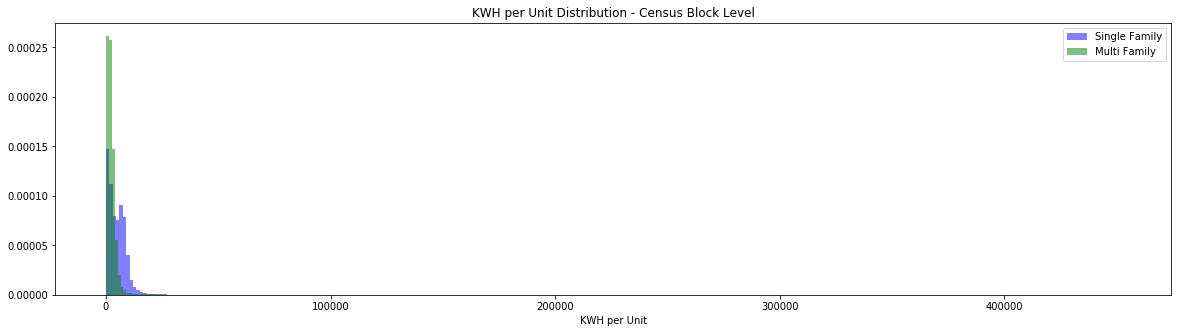

In [6]:
## KWH per Unit Distribution

# Calculate KWH per Unit

KWH_Per_Unit = df_residential['TOTAL KWH'] / df_residential['TOTAL UNITS']

# Create separate dataframes for Sing Family homes and Multi Family homes

df_residential_unit = pd.concat([df_residential,KWH_Per_Unit], axis=1)
df_residential_unit.columns.values[73] = 'KWH_Per_Unit'
df_single = df_residential_unit.loc[df_residential_unit['BUILDING_SUBTYPE'] == 'Single Family']
df_multi = df_residential_unit.loc[df_residential_unit['BUILDING_SUBTYPE'] != 'Single Family']

# Create histogram

plt.figure(figsize=(20,5))

plt.hist(df_single['KWH_Per_Unit'],bins=300,alpha=0.5,color='blue',density='True',label='Single Family')
plt.hist(df_multi['KWH_Per_Unit'],bins=300,alpha=0.5,color='green',density='True',label='Multi Family')
plt.legend(loc='upper right')
plt.xlabel('KWH per Unit')
plt.title('KWH per Unit Distribution - Census Block Level')

When comparing the distributions in the above histogram, we can see clearly that KWH per Unit usage for Single Family homes skews more towards the higher end than other housing types.

Next, we'll take a random sample of 100 observations from each population and perform a t-test to measure the likelihood that there is a statistically significant difference between the two distributions.

nan


C:\Users\colem\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\colem\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\colem\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Ttest_indResult(statistic=nan, pvalue=nan)


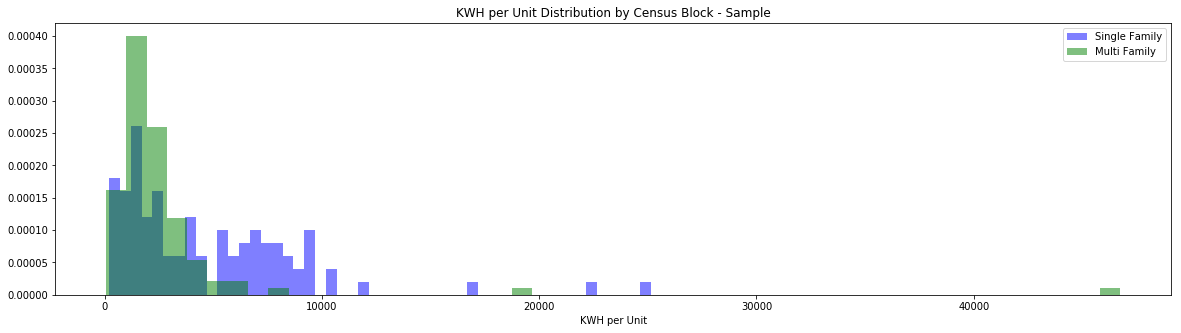

In [7]:
# Select random sample of 100 observations from Single Family population and 100 observations from Multi Family population

single_sample = np.random.choice(df_single['KWH_Per_Unit'], 100, replace=True)
multi_sample = np.random.choice(df_multi['KWH_Per_Unit'], 100, replace=True)

# Create histogram

plt.figure(figsize=(20,5))

plt.hist(single_sample,alpha=0.5,color='blue',bins=50,label='Single Family',density='True') 
plt.hist(multi_sample,alpha=0.5,color='green',bins=50,label='Multi Family',density='True') 
plt.legend(loc='upper right')
plt.xlabel('KWH per Unit')
plt.title('KWH per Unit Distribution by Census Block - Sample')

# Perform t-test comparing mean energy consumption of single family homes to multi family homes

diff=multi_sample.mean() - single_sample.mean()

size = np.array([len(single_sample), len(multi_sample)])
sd = np.array([single_sample.std(), multi_sample.std()])

diff_se = (sum(sd ** 2 / size)) ** 0.5  
 
print(diff/diff_se)

from scipy.stats import ttest_ind
print(ttest_ind(multi_sample, single_sample, equal_var=False))

With a p-value so small, we can conclude with a high degree of certainty that Single Family homes use more KWH per Unit on average than multi family homes.  

To conclude, we've found that the largest share of energy consumption (on a per unit basis) in Chicago during 2010 came from Single Family homes in neighborhoods that tend to be less dense and have a higher percentage of Single Family homes.

## Proposal for further research
As a next step, I'd like to include historical data on the average replacement time of equipment so that we can develop a way to predict when utility equipment is likely in need of replacement. We could achieve this by performing linear regression of average replacement time over KWH per Unit usage, age of equipment, number of severe storms, and other interesting variables.